## 5.1 CNN introduction

In [1]:
# small CNN
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

Using TensorFlow backend.


In [2]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


In [3]:
# add classifier
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [4]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                36928     
__________

In [6]:
# training with mnist
from keras.datasets import mnist
from keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

model.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=5, batch_size=64)

Epoch 1/5
60000/60000 [==============================] - 30s - loss: 0.1709 - acc: 0.9471    
Epoch 2/5
60000/60000 [==============================] - 15s - loss: 0.0491 - acc: 0.9848    
Epoch 3/5
60000/60000 [==============================] - 15s - loss: 0.0333 - acc: 0.9899    
Epoch 4/5
60000/60000 [==============================] - 15s - loss: 0.0261 - acc: 0.9919    
Epoch 5/5
60000/60000 [==============================] - 14s - loss: 0.0192 - acc: 0.9942    


In [8]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('test_acc', test_acc)

 9760/10000 [============================>.] - ETA: 0stest_acc 0.9913


### 5.1.1 Convolution

- translation invariant
- spatial hierarchies of patterns

### 5.1.2 Max pooling 

## 5.2 CNN with small dataset 

- from scratch
- feature selection with pre-trained model
- tuning with pre-trained model

### 5.2.2 Data collection 

In [1]:
import os, shutil

original_dataset_dir = './data/kaggle_original_data'

base_dir = './data/cats_and_dogs_small'
os.mkdir(base_dir)

train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)

validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

FileExistsError: [WinError 183] 当文件已存在时，无法创建该文件。: './data/cats_and_dogs_small'

### 5.2.3 Network design

In [8]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [9]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [10]:
from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=1e-4),
              loss='binary_crossentropy',
              metrics=['acc'])

### 5.2.4 Data preprocessing

In [11]:
# load image
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150,150),
        batch_size=20,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150,150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [12]:
# fit model with batch generator
history = model.fit_generator(
        train_generator,
        steps_per_epoch=100,
        epochs=30,
        validation_data=validation_generator,
        validation_steps=50)

Epoch 1/30
100/100 [==============================] - 34s - loss: 0.6879 - acc: 0.5300 - val_loss: 0.6805 - val_acc: 0.5570
Epoch 2/30
100/100 [==============================] - 18s - loss: 0.6607 - acc: 0.6000 - val_loss: 0.6360 - val_acc: 0.6460
Epoch 3/30
100/100 [==============================] - 19s - loss: 0.6107 - acc: 0.6695 - val_loss: 0.6170 - val_acc: 0.6490
Epoch 4/30
100/100 [==============================] - 18s - loss: 0.5710 - acc: 0.6930 - val_loss: 0.5964 - val_acc: 0.6690
Epoch 5/30
100/100 [==============================] - 18s - loss: 0.5437 - acc: 0.7210 - val_loss: 0.6025 - val_acc: 0.6600
Epoch 6/30
100/100 [==============================] - 18s - loss: 0.5124 - acc: 0.7410 - val_loss: 0.5671 - val_acc: 0.6950
Epoch 7/30
100/100 [==============================] - 18s - loss: 0.4868 - acc: 0.7670 - val_loss: 0.5849 - val_acc: 0.6840
Epoch 8/30
100/100 [==============================] - 18s - loss: 0.4637 - acc: 0.7850 - val_loss: 0.5405 - val_acc: 0.7180
Epoch 9/

In [13]:
# save model
model.save('cats_and_dogs_small_1.h5')

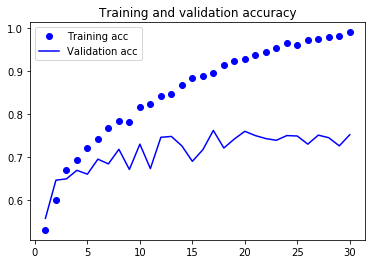

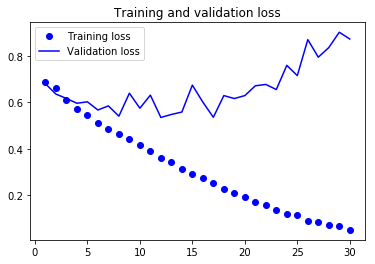

In [14]:
# plot loss curve and acc curve
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### 5.2.5 Data Augmentation 

In [3]:
# use ImageDataGenerator
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

Using TensorFlow backend.


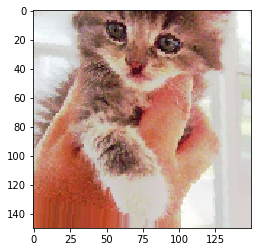

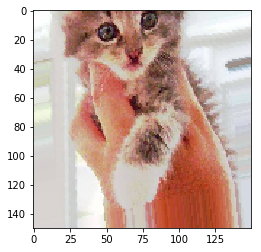

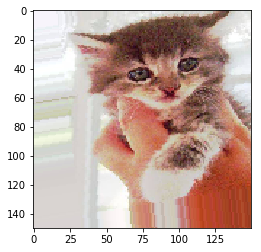

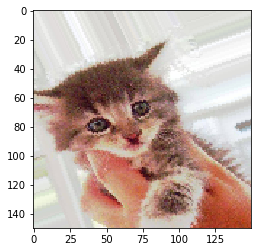

In [8]:
from keras.preprocessing import image
import matplotlib.pyplot as plt
%matplotlib inline

train_cats_dir = './data/cats_and_dogs_small/train/cats/'

fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]

img_path = fnames[3]

img = image.load_img(img_path, target_size=(150, 150))

x = image.img_to_array(img)

x = x.reshape((1,) + x.shape)

i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure()
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
        
plt.show()

In [9]:
from keras import layers
from keras import models
from keras import optimizers

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=1e-4),
              loss='binary_crossentropy',
              metrics=['acc'])

In [11]:
train_dir = './data/cats_and_dogs_small/train/'
validation_dir = './data/cats_and_dogs_small/validation/'

train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

history = model.fit_generator(
        train_generator,
        steps_per_epoch=100,
        epochs=100,
        validation_data=validation_generator,
        validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 59s - loss: 0.6940 - acc: 0.5128 - val_loss: 0.6853 - val_acc: 0.5057
Epoch 2/100
100/100 [==============================] - 27s - loss: 0.6796 - acc: 0.5547 - val_loss: 0.6562 - val_acc: 0.6076
Epoch 3/100
100/100 [==============================] - 27s - loss: 0.6641 - acc: 0.5888 - val_loss: 0.6467 - val_acc: 0.6244
Epoch 4/100
100/100 [==============================] - 28s - loss: 0.6490 - acc: 0.6272 - val_loss: 0.6422 - val_acc: 0.6173
Epoch 5/100
100/100 [==============================] - 28s - loss: 0.6386 - acc: 0.6353 - val_loss: 0.6038 - val_acc: 0.6688
Epoch 6/100
100/100 [==============================] - 28s - loss: 0.6173 - acc: 0.6566 - val_loss: 0.5774 - val_acc: 0.6897
Epoch 7/100
100/100 [==============================] - 28s - loss: 0.6105 - acc: 0.6588 - val_loss: 0.5684 - val_acc: 0.7010
Epoch 8/100
100/100 [====================

100/100 [==============================] - 32s - loss: 0.4090 - acc: 0.8144 - val_loss: 0.4275 - val_acc: 0.7843
Epoch 66/100
100/100 [==============================] - 31s - loss: 0.3854 - acc: 0.8278 - val_loss: 0.4064 - val_acc: 0.8236
Epoch 67/100
100/100 [==============================] - 32s - loss: 0.4113 - acc: 0.8097 - val_loss: 0.4446 - val_acc: 0.7854
Epoch 68/100
100/100 [==============================] - 31s - loss: 0.4091 - acc: 0.8059 - val_loss: 0.3939 - val_acc: 0.8325
Epoch 69/100
100/100 [==============================] - 31s - loss: 0.3965 - acc: 0.8181 - val_loss: 0.4454 - val_acc: 0.7977
Epoch 70/100
100/100 [==============================] - 31s - loss: 0.3921 - acc: 0.8150 - val_loss: 0.4482 - val_acc: 0.7944
Epoch 71/100
100/100 [==============================] - 32s - loss: 0.3851 - acc: 0.8247 - val_loss: 0.4043 - val_acc: 0.8128
Epoch 72/100
100/100 [==============================] - 31s - loss: 0.4008 - acc: 0.8194 - val_loss: 0.4036 - val_acc: 0.8202
Epoch

In [12]:
model.save('cats_and_dogs_small_2.h5')

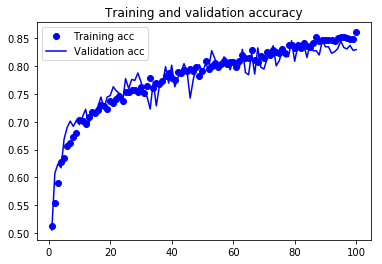

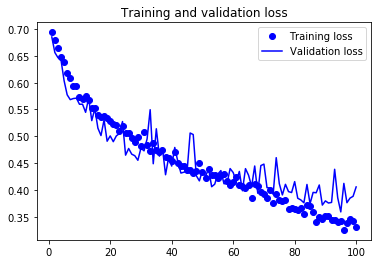

In [13]:
# plot loss curve and acc curve

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## 5.3 Use pre-trained CNN

### 5.3.1 Feature extraction

In [14]:
from keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))

conv_base.summary()

58826752/58889256 [============================>.] - ETA: 0s_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (Max

In [16]:
# 1. fast feature extraction without data augmentation
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

base_dir = './data/cats_and_dogs_small/'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(
        directory,
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            break
    return features, labels

train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(validation_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)

train_features = np.reshape(train_features, (2000, 4 * 4 * 512))
validation_features = np.reshape(validation_features, (1000, 4 * 4 * 512))
test_features = np.reshape(test_features, (1000, 4 * 4 * 512))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [18]:
# add dense layer
from keras import layers
from keras import models
from keras import optimizers

model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=4 * 4 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(train_features, train_labels,
                    epochs=30,
                    batch_size=20,
                    validation_data=(validation_features, validation_labels))

Train on 2000 samples, validate on 1000 samples
Epoch 1/30
2000/2000 [==============================] - 2s - loss: 0.5842 - acc: 0.6795 - val_loss: 0.4313 - val_acc: 0.8510
Epoch 2/30
2000/2000 [==============================] - 1s - loss: 0.4267 - acc: 0.8200 - val_loss: 0.3594 - val_acc: 0.8560
Epoch 3/30
2000/2000 [==============================] - 1s - loss: 0.3641 - acc: 0.8425 - val_loss: 0.3213 - val_acc: 0.8770
Epoch 4/30
2000/2000 [==============================] - 1s - loss: 0.3195 - acc: 0.8640 - val_loss: 0.3105 - val_acc: 0.8680
Epoch 5/30
2000/2000 [==============================] - 1s - loss: 0.2829 - acc: 0.8870 - val_loss: 0.2825 - val_acc: 0.8860
Epoch 6/30
2000/2000 [==============================] - 2s - loss: 0.2671 - acc: 0.8990 - val_loss: 0.2716 - val_acc: 0.8960
Epoch 7/30
2000/2000 [==============================] - 1s - loss: 0.2481 - acc: 0.9025 - val_loss: 0.2663 - val_acc: 0.8950
Epoch 8/30
2000/2000 [==============================] - 2s - loss: 0.2354 - a

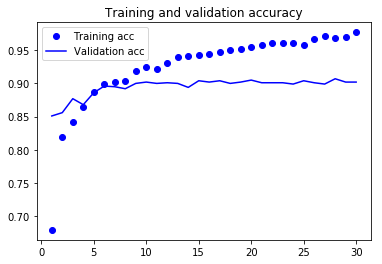

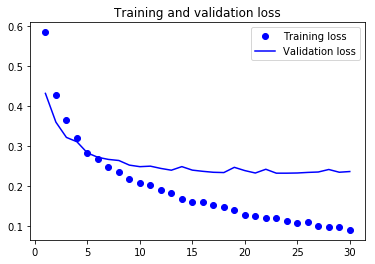

In [19]:
# plot loss curve and acc curve

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [20]:
# 2. features extract with DA
from keras import layers
from keras import models

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_2 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


In [21]:
conv_base.trainable = False

In [22]:
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers

train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit_generator(
        train_generator,
        steps_per_epoch=100,
        epochs=30,
        validation_data=validation_generator,
        validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/30
 62/100 [=================>............] - ETA: 58s - loss: 0.5075 - acc: 0.7508

KeyboardInterrupt: 

In [ ]:
# plot loss curve and acc curve

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### 5.3.2 Fine-tuning

Steps for fine-tuning : 
- add layers to base network
- freeze base network
- train the added part
- un-freeze a part of base network
- train the un-freeze part and added part

In [23]:
conv_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________

In [25]:
# freeze
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [26]:
model.compile(optimizer=optimizers.RMSprop(lr=1e-5),
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit_generator(
        train_generator,
        steps_per_epoch=100,
        epochs=100,
        validation_data=validation_generator,
        validation_steps=50)

Epoch 1/100
100/100 [==============================] - 71s - loss: 0.2520 - acc: 0.8940 - val_loss: 0.1675 - val_acc: 0.9370
Epoch 2/100
100/100 [==============================] - 71s - loss: 0.2240 - acc: 0.9065 - val_loss: 0.1428 - val_acc: 0.9440
Epoch 3/100
100/100 [==============================] - 71s - loss: 0.2025 - acc: 0.9190 - val_loss: 0.1575 - val_acc: 0.9370
Epoch 4/100
100/100 [==============================] - 71s - loss: 0.1775 - acc: 0.9250 - val_loss: 0.1220 - val_acc: 0.9470
Epoch 5/100
100/100 [==============================] - 73s - loss: 0.1676 - acc: 0.9295 - val_loss: 0.1204 - val_acc: 0.9460
Epoch 6/100
100/100 [==============================] - 75s - loss: 0.1636 - acc: 0.9300 - val_loss: 0.1466 - val_acc: 0.9420
Epoch 7/100
 97/100 [============================>.] - ETA: 1s - loss: 0.1480 - acc: 0.9433

KeyboardInterrupt: 

In [ ]:
# plot loss curve and acc curve

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
# make the curve more smooth
def smooth_curve(points, factor=0.8):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

plt.plot(epochs, smooth_curve(acc), 'bo', label='Smoothed training acc')
plt.plot(epochs, smooth_curve(val_acc), 'b', label='Smoothed validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, smooth_curve(loss), 'bo', label='Smoothed training loss')
plt.plot(epochs, smooth_curve(val_loss), 'b', label='Smoothed validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc)